In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

In [4]:
reeses = cv2.imread('data/reeses_puffs.png', 0)

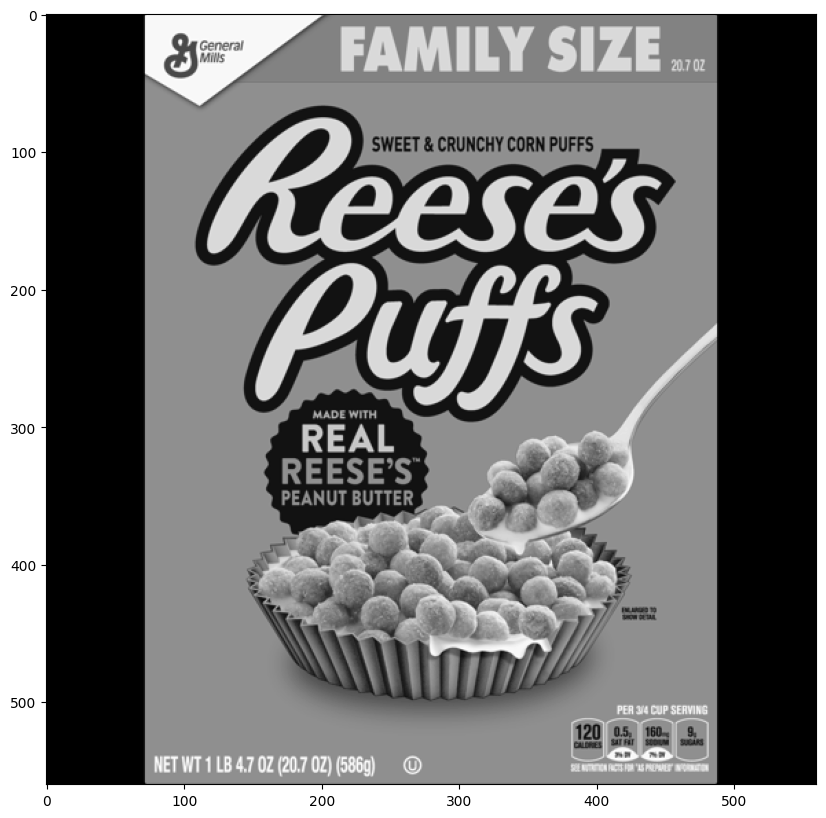

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread('data/many_cereals.jpg', 0)

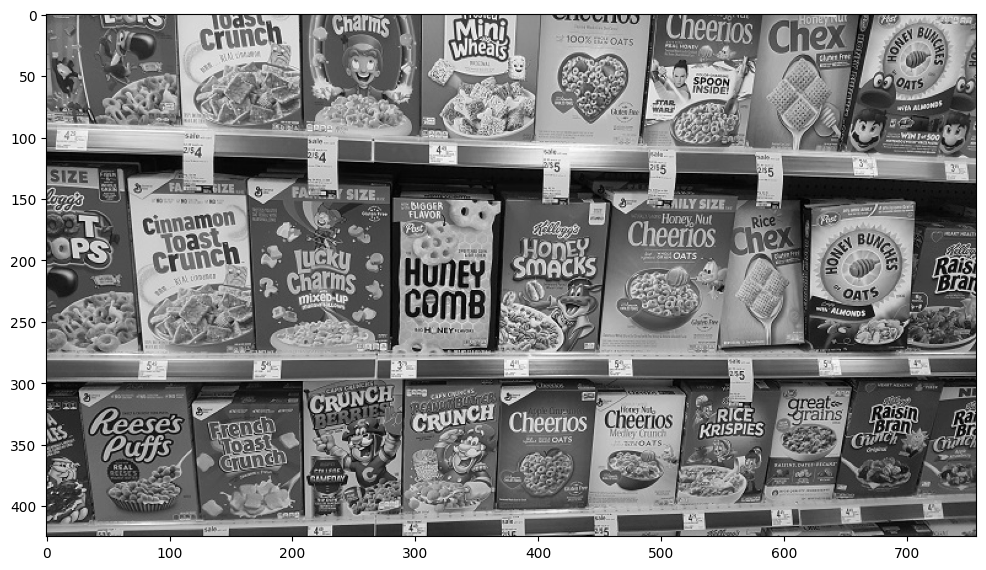

In [7]:
display(cereals)

In [8]:
orb = cv2.ORB_create()

In [16]:
kp1_orb, des1_orb = orb.detectAndCompute(reeses, None)
kp2_orb, des2_orb = orb.detectAndCompute(cereals, None)

In [26]:
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [27]:
matches_orb = bf_orb.match(des1_orb, des2_orb)

In [20]:
matches_orb = sorted(matches_orb, key=lambda x:x.distance)

In [21]:
reeses_matches_orb = cv2.drawMatches(reeses, kp1, cereals, kp2, matches_orb[:25], None, flags=2)

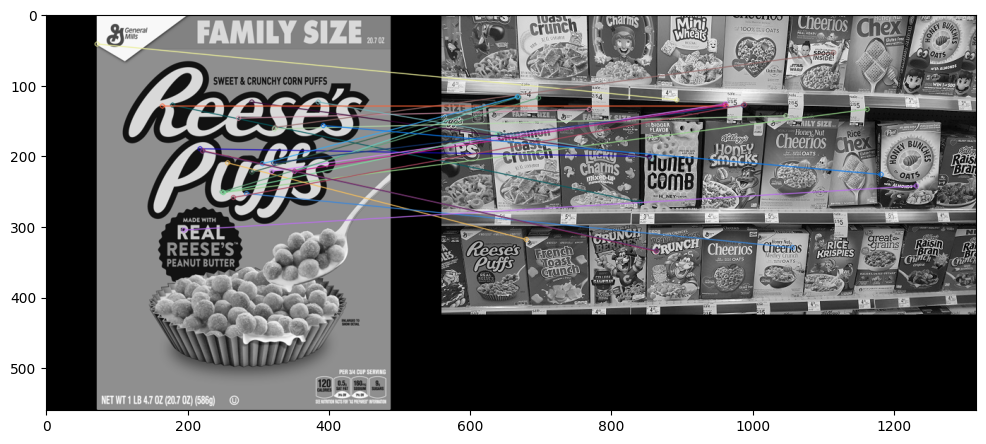

In [22]:
display(reeses_matches_orb)

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [23]:
kp1_sift, des1_sift = sift.detectAndCompute(reeses, None)
kp2_sift, des2_sift = sift.detectAndCompute(cereals, None)

In [28]:
bf_sift = cv2.BFMatcher()

In [30]:
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

In [32]:
 good_matches_sift = []

 for match1, match2 in matches_sift:
    if match1.distance < 0.75*match2.distance:
        good_matches_sift.append([match1])

In [33]:
reeses_matches_sift = cv2.drawMatchesKnn(reeses, kp1_sift, cereals, kp2_sift, good_matches_sift, None, flags=2)

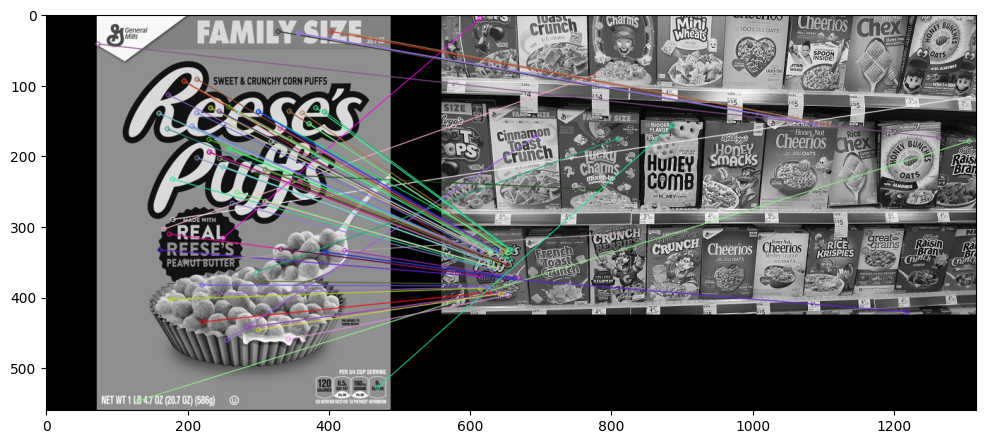

In [34]:
display(reeses_matches_sift)

In [35]:
FLANN_INDEX_KTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KTREE, trees=5)
search_params = dict(checks=50)

In [36]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [37]:
matches_flann = flann.knnMatch(des1_sift, des2_sift, k=2)

In [38]:
 good_matches_flann = []

 for match1, match2 in matches_flann:
    if match1.distance < 0.75*match2.distance:
        good_matches_flann.append([match1])

In [39]:
reeses_matches_flann = cv2.drawMatchesKnn(reeses, kp1_sift, cereals, kp2_sift, good_matches_flann, None, flags=0)

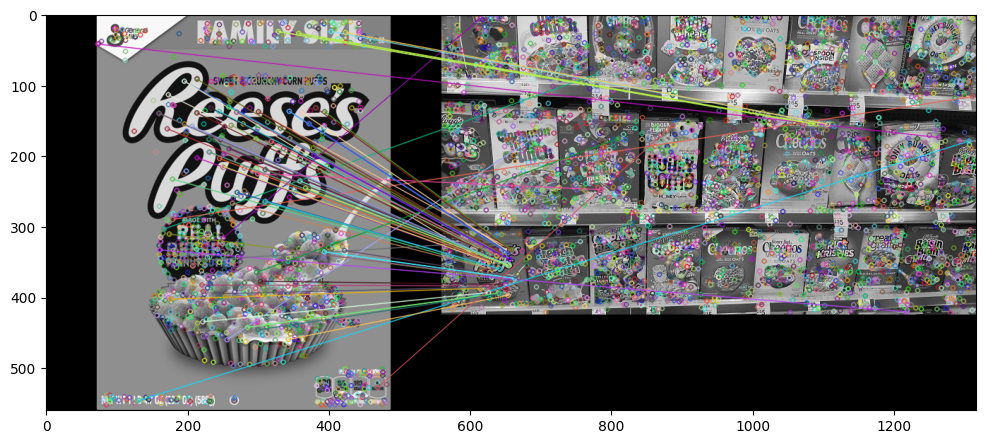

In [40]:
display(reeses_matches_flann)

In [42]:
matchesMask_flann = [[0, 0] for i in range(len(matches_flann))]

In [43]:
for i, (match1, match2) in enumerate(matches_flann):
    if match1.distance < 0.75*match2.distance:
        matchesMask_flann[i] = [1, 0]

In [46]:
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask_flann,
    flags=0            
)

In [47]:
reeses_matches_mask_flann = cv2.drawMatchesKnn(reeses, kp1_sift, cereals, kp2_sift, matches_flann, None, **draw_params)

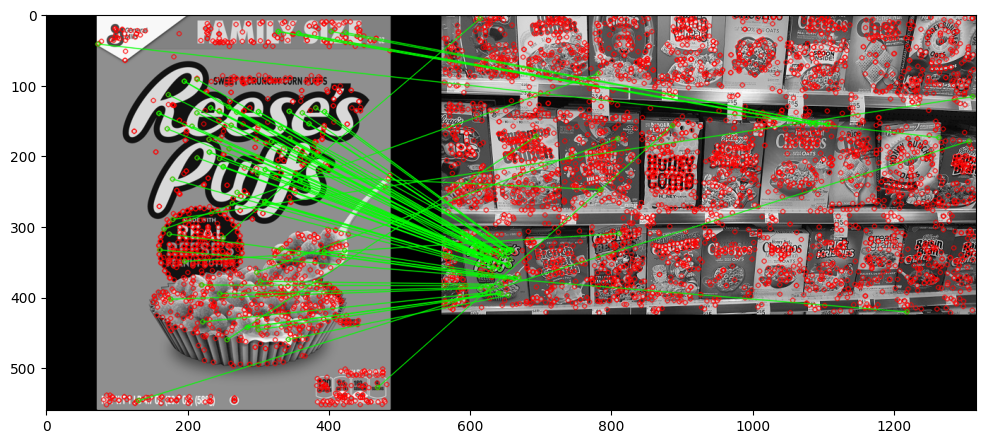

In [48]:
display(reeses_matches_mask_flann)